In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [149]:
data = pd.read_csv('amazon_prime_users.csv')

Data wrangling = reducing the memory and exploring data

In [150]:
data.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [151]:
data.tail()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7
2499,2500,Mark Nicholson,martinisaac@example.net,martinisaac,1972-11-13,Female,Estradaborough,2024-01-28,2025-01-27,Annual,Visa,Auto-renew,Regular,Books,Documentary,Smart TV,High,3.3,9


In [152]:
data.shape

(2500, 19)

In [153]:
print(data['Subscription Plan'].value_counts())
print(data['Payment Information'].value_counts())
print(data['Renewal Status'].value_counts())
print(data['Usage Frequency'].value_counts())
print(data['Purchase History'].value_counts())
print(data['Favorite Genres'].value_counts())

Subscription Plan
Annual     1271
Monthly    1229
Name: count, dtype: int64
Payment Information
Mastercard    856
Visa          838
Amex          806
Name: count, dtype: int64
Renewal Status
Auto-renew    1274
Manual        1226
Name: count, dtype: int64
Usage Frequency
Frequent      851
Regular       827
Occasional    822
Name: count, dtype: int64
Purchase History
Books          851
Electronics    847
Clothing       802
Name: count, dtype: int64
Favorite Genres
Horror         383
Action         380
Romance        368
Drama          361
Comedy         349
Documentary    340
Sci-Fi         319
Name: count, dtype: int64


In [154]:
cols_drop = ['Email Address', 'Username', 'Location']
data.drop(cols_drop, inplace = True, axis=1)
data.head()

,User ID,Name,Date of Birth,Gender,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,1953-06-03,Male,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,1978-07-08,Male,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,1994-12-06,Female,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,1964-12-22,Female,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,1961-06-04,Male,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [155]:
data['Membership End Date'] = pd.to_datetime(data['Membership End Date'])
data['Membership Start Date'] = pd.to_datetime(data['Membership Start Date'])
data['Avg Membership Time'] = data['Membership End Date'] - data['Membership Start Date']
data.head()

,User ID,Name,Date of Birth,Gender,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Avg Membership Time
0,1,Ronald Murphy,1953-06-03,Male,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3,365 days
1,2,Scott Allen,1978-07-08,Male,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7,365 days
2,3,Jonathan Parrish,1994-12-06,Female,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8,365 days
3,4,Megan Williams,1964-12-22,Female,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7,365 days
4,5,Kathryn Brown,1961-06-04,Male,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1,365 days


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   User ID                        2500 non-null   int64          
 1   Name                           2500 non-null   object         
 2   Date of Birth                  2500 non-null   object         
 3   Gender                         2500 non-null   object         
 4   Membership Start Date          2500 non-null   datetime64[ns] 
 5   Membership End Date            2500 non-null   datetime64[ns] 
 6   Subscription Plan              2500 non-null   object         
 7   Payment Information            2500 non-null   object         
 8   Renewal Status                 2500 non-null   object         
 9   Usage Frequency                2500 non-null   object         
 10  Purchase History               2500 non-null   object         
 11  Favo

In [157]:
data['Name'] = data['Name'].astype('string')
data['Gender'] = data['Gender'].astype('category')
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])
data['Renewal Status'] = data['Renewal Status'].astype('category')
data['Devices Used'] = data['Devices Used'].astype('category')


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   User ID                        2500 non-null   int64          
 1   Name                           2500 non-null   string         
 2   Date of Birth                  2500 non-null   datetime64[ns] 
 3   Gender                         2500 non-null   category       
 4   Membership Start Date          2500 non-null   datetime64[ns] 
 5   Membership End Date            2500 non-null   datetime64[ns] 
 6   Subscription Plan              2500 non-null   object         
 7   Payment Information            2500 non-null   object         
 8   Renewal Status                 2500 non-null   category       
 9   Usage Frequency                2500 non-null   object         
 10  Purchase History               2500 non-null   object         
 11  Favo

Data visualization

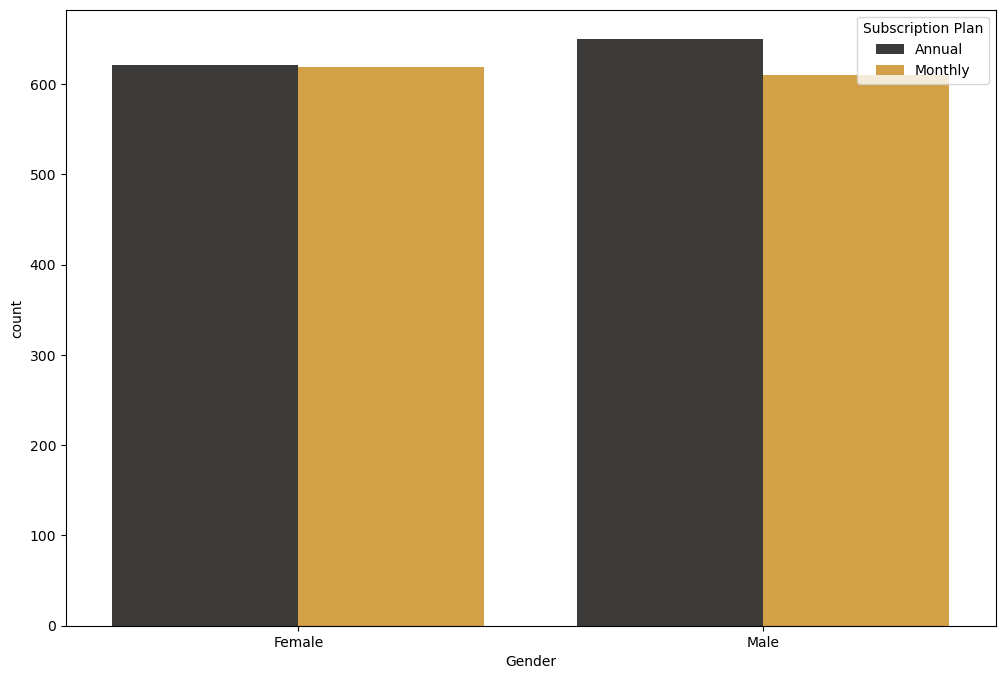

In [159]:
plt.figure(figsize = (12,8))
sns.countplot(data = data , x='Gender', hue = 'Subscription Plan', palette='dark:orange', saturation= 0.6, alpha = 0.9, legend='brief')
plt.show()

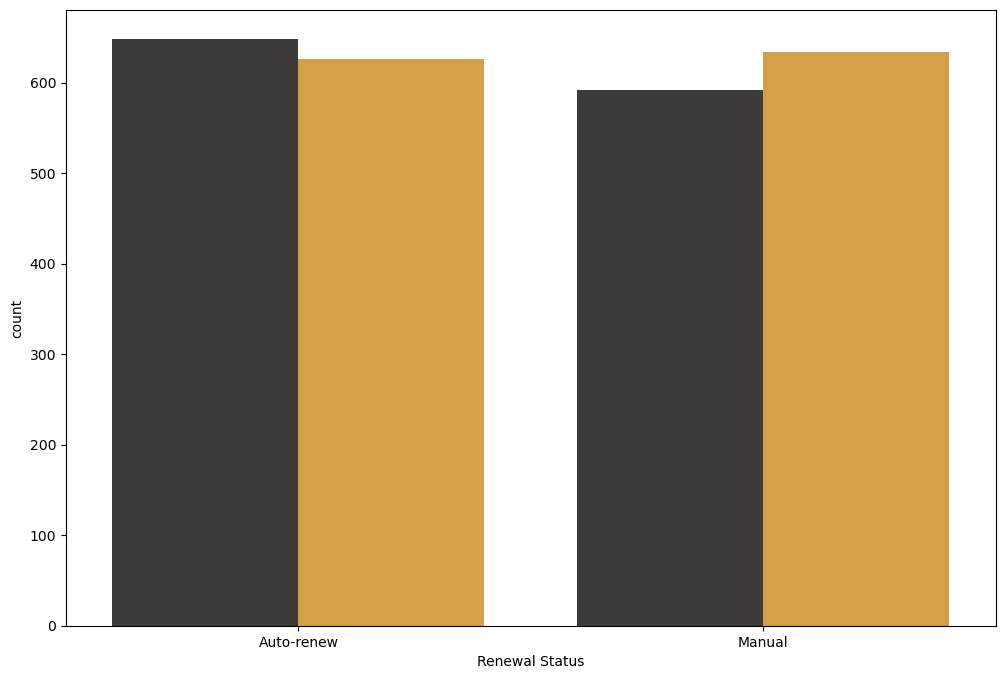

In [160]:
plt.figure(figsize = (12,8))
sns.countplot(data=data, x=data['Renewal Status'], palette='dark:orange', hue=data['Gender'], saturation= 0.6, alpha = 0.9, legend=False)
plt.show()

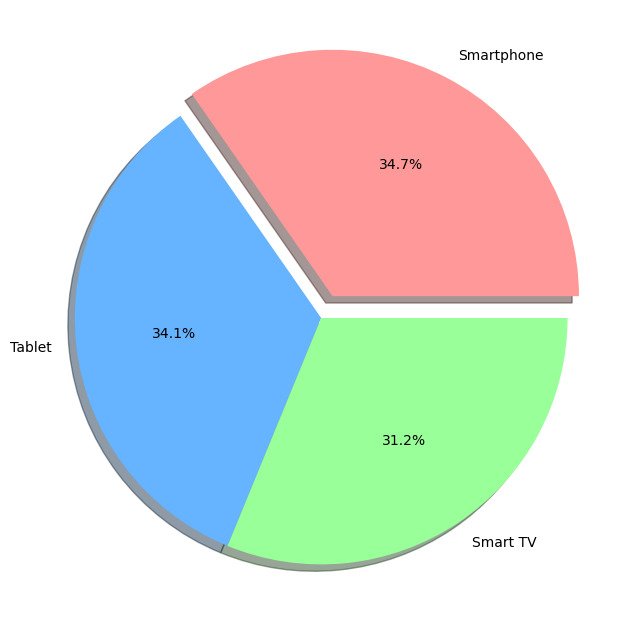

In [162]:
#Pie chart of percentage devices usage
plt.figure(figsize=(12,8))
explode = (0.1, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(data['Devices Used'].value_counts(), labels= data['Devices Used'].value_counts().index,
        autopct='%1.1f%%', colors=colors, shadow=True, explode=explode)
plt.show()

In [163]:
data.set_index('Devices Used', inplace=True)

In [165]:
data.head()

,User ID,Name,Date of Birth,Gender,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Avg Membership Time
Devices Used,,,,,,,,,,,,,,,,
Smart TV,1,Ronald Murphy,1953-06-03,Male,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Medium,3.6,3,365 days
Smartphone,2,Scott Allen,1978-07-08,Male,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Medium,3.8,7,365 days
Smart TV,3,Jonathan Parrish,1994-12-06,Female,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Low,3.3,8,365 days
Smart TV,4,Megan Williams,1964-12-22,Female,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,High,3.3,7,365 days
Smart TV,5,Kathryn Brown,1961-06-04,Male,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Low,4.3,1,365 days


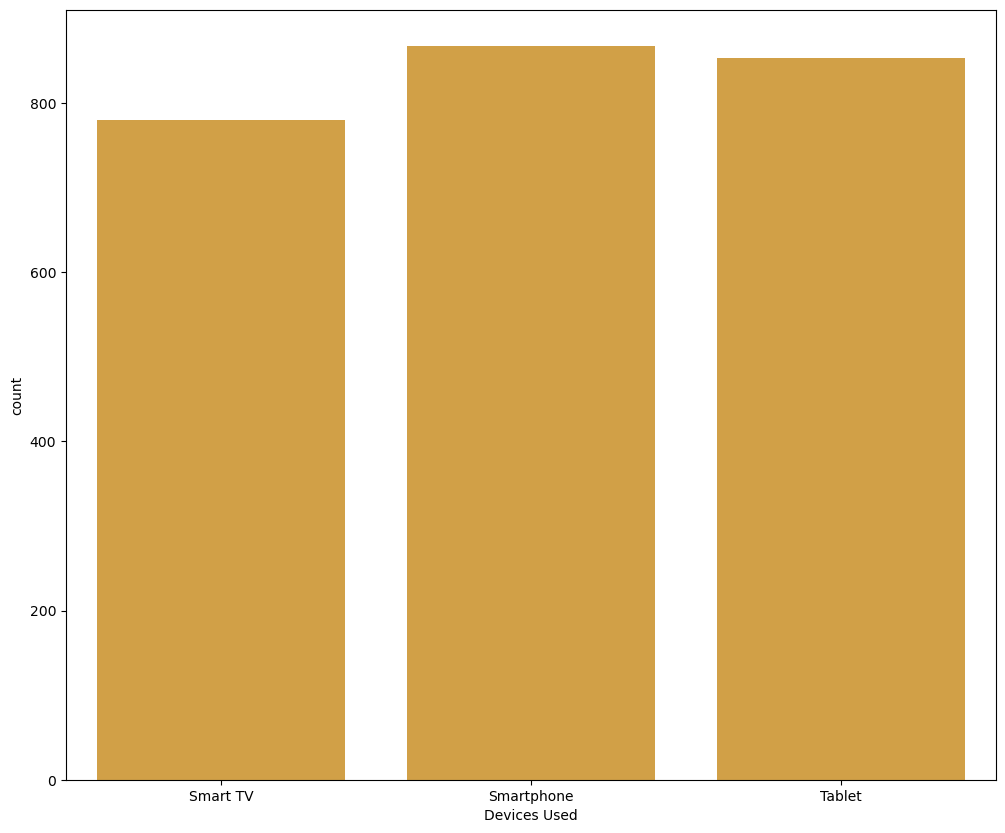

In [179]:
#Count of most popular device type
plt.figure(figsize=(12,10))
sns.countplot(data=data, x=data.index, color='orange', saturation= 0.6, alpha = 0.9, legend='brief')
plt.show()

Text(0.5, 1.0, 'Renewal status based on device type')

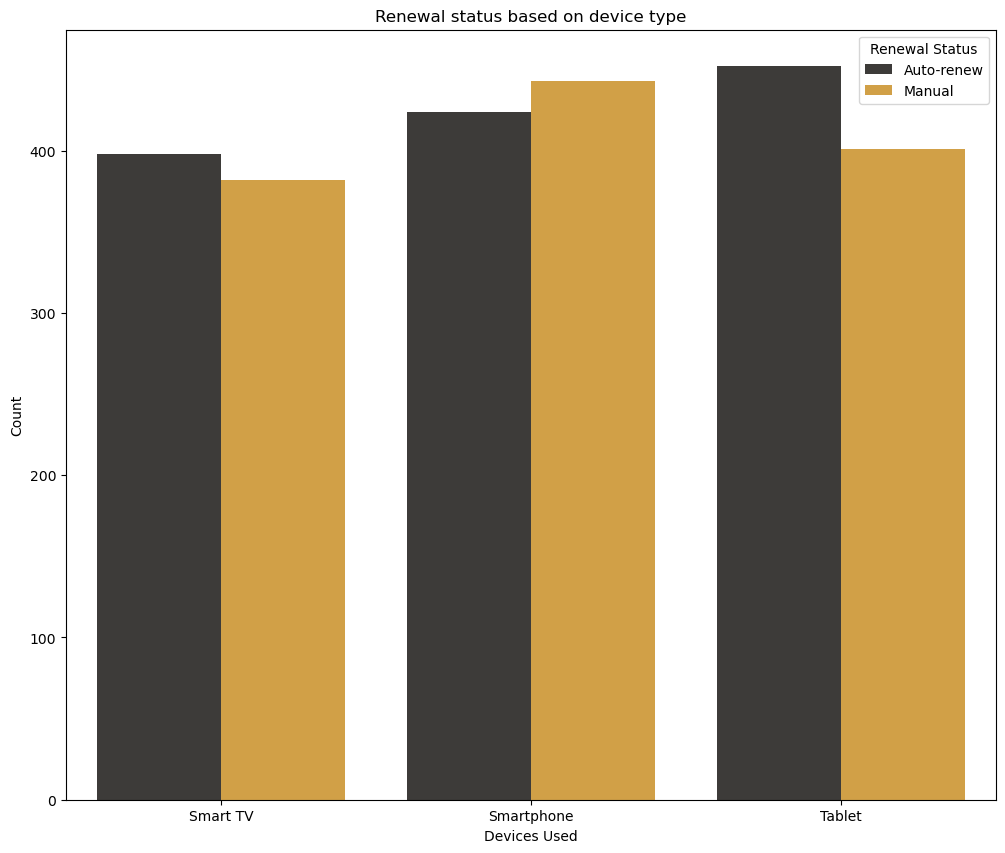

In [175]:
#Checking the pattern of renewal status
plt.figure(figsize=(12,10))
sns.countplot(data=data, x=data.index, hue=data['Renewal Status'], palette='dark:orange', saturation= 0.6, alpha = 0.9, legend='brief')

plt.ylabel('Count')
plt.title('Renewal status based on device type')

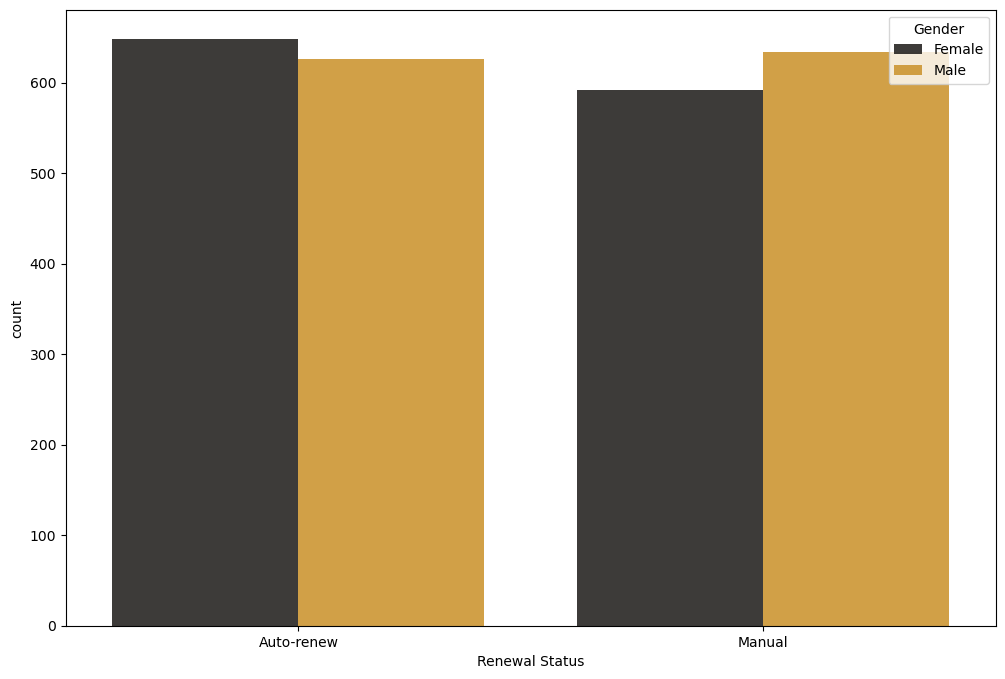

In [182]:
#Renewal status by gender
plt.figure(figsize = (12,8))
sns.countplot(data=data, x=data['Renewal Status'], palette='dark:orange', hue=data['Gender'], saturation= 0.6, alpha = 0.9, legend='brief')
plt.show()

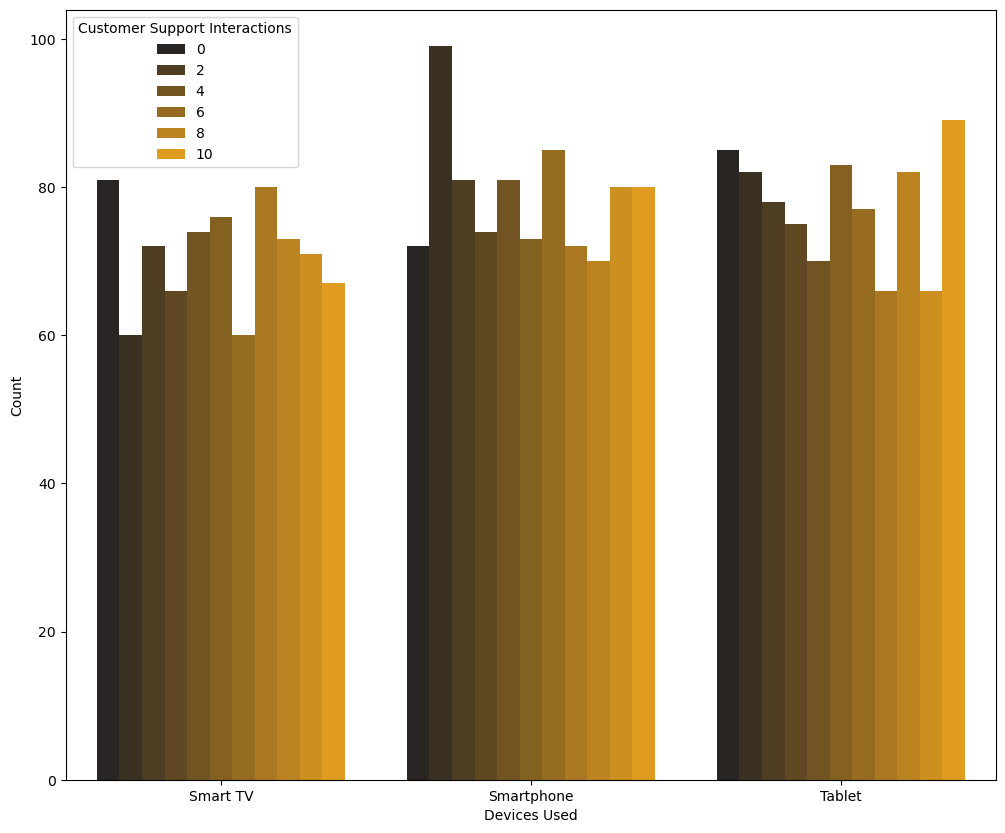

In [183]:
#CUstomer SUpport interaction based on device type
plt.figure(figsize=(12,10))
sns.countplot(data=data, x=data.index, hue=data['Customer Support Interactions'], palette='dark:orange')

plt.ylabel('Count')
plt.show()